### 피마 인디언 당뇨병

In [1]:
import os
print(os.environ['PATH'])

C:\Program Files\Common Files\Oracle\Java\javapath;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files (x86)\ESTsoft\ALZip;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\WINDOWS\System32\OpenSSH\;C:\Program Files\dotnet\;C:\jdk-21_windows-x64_bin (1)\jdk-21.0.5\bin;C:\Program Files\Git\cmd;C:\Users\user\AppData\Local\Programs\Python\Launcher\;C:\Users\user\AppData\Local\Microsoft\WindowsApps;C:\Program Files (x86)\ESTsoft\ALZip;C:\Program Files\JetBrains\PyCharm Community Edition 2024.1.5\bin;;C:\sqlite;C:\Users\user\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\user\AppData\Local\Programs\Python\Python313\Scripts;


In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
diabetes_data = pd.read_csv('./diabetes.csv')
diabetes_data.shape    # 768개 행, 9개 열

(768, 9)

In [3]:
diabetes_data.head(8)  #  8개 행 추출

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [4]:
diabetes_data.info()   # 데이터셋 정보 추출

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Pregnancies   임신 횟수                
- Glucose       2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도            
- BloodPressure 이완기 혈압(mm Hg)             
- SkinThickness 삼두근 피부 주름 두께(mm), 체지방 추정 시 사용되는 값             
- Insulin       2시간 혈청 인슐린 (mu U / ml)              
- BMI           체질량 지수 (체중 / 키^2)            
- DiabetesPedigreeFunction  당뇨병 혈통 기능
- Age           나이            
- Outcome       768개 중 268개의 결과 클래스 변수는 1이고 나머지는 0    

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 총 768개의 데이터 , 결측치는 없음
# 평균 임신 횟수 3.8회 / 표준편차가 약 3.4로 변동성이 큼 / 최대 17번 임신 / 임신 횟수에 따른 호르몬 변화도 영향 미칠 가능성 있
# 평균 혈당 수치 120.9로 공복혈당 기준보다 높음 / 개인별 편차가 큼 / min값은 전처리시 확인 필요 / 최대 혈당은 매우 높음
# 평균 혈압 69.1 / 표준편차 19.4 / min값 오류처럼 보임 / 최소값이 비정상적이라 데이터 품질 관리 중요
# 평균 피부 두께 20.5 / 표준편차 15.9 / min값 이것또한 생리학적으로 불가능하여 처리 / 체지방량과 간접 연관
# 평균 인슐린 수치 79.7 / 표준편차 115.2 변동성 매우 큼 / min 처리 필요 / 최대값이 846이며 매우 높음
# 평균 BMI 수치 31.9 / 표준편차 7.8 / min값 나올 수가 없는 숫자라 처리 / 최댓값이 67.1 극단적인 비만에 해당
# 평균 0.47 / 표준편차 0.33 / min 0.078 / 최댓값 2.42로 가족력이 매우 강한 편 / 유전적 요인이 강하게 작용하는 당뇨병
# 평균 나이 33.2 / 표준편차 11.8 / 최소 21세 / 최대 81세
# 평균 0.35로 35%가 당뇨 양성(1), 65% 음성(0) / 표준편차 0.48 고르게 분포 / 예측해야 할 목표 변수 !

In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [8]:
diabetes_data.columns[:-1]   # 학습, 예측에 사용할 컬럼

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [9]:
target = diabetes_data.columns[-1]    # 예측해야할 레이블 컬럼

In [10]:
from sklearn.model_selection import train_test_split

data =  diabetes_data.copy()

# 학습, 예측 사용할 컬럼과 예측해야할 타겟 분리
X = data.drop(target, axis = 1)
y = data[target]

# train / test 데이터셋 분리  
#test_size = 0.2    8:2비율
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=100)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)   # 1차원 배열로 열의 개념이 명확하게 드러나지 않음
print('y_test shape:', y_test.shape)


X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 5)  # 설정하지 않을 시 가지가 너무 많음

model.fit(X_train, y_train)

y_pred = model.predict(X_test)    # ML 모델 사용하여 테스트용 특징 데이터에 대한 예측 수행
y_pred[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

[Text(0.4115853658536585, 0.9166666666666666, 'Glucose <= 123.5\ngini = 0.455\nsamples = 614\nvalue = [399, 215]'),
 Text(0.1524390243902439, 0.75, 'Age <= 28.5\ngini = 0.276\nsamples = 357\nvalue = [298, 59]'),
 Text(0.2820121951219512, 0.8333333333333333, 'True  '),
 Text(0.07317073170731707, 0.5833333333333334, 'Pregnancies <= 7.5\ngini = 0.103\nsamples = 201\nvalue = [190, 11]'),
 Text(0.04878048780487805, 0.4166666666666667, 'BMI <= 30.95\ngini = 0.095\nsamples = 200\nvalue = [190, 10]'),
 Text(0.024390243902439025, 0.25, 'gini = 0.0\nsamples = 117\nvalue = [117, 0]'),
 Text(0.07317073170731707, 0.25, 'BMI <= 31.1\ngini = 0.212\nsamples = 83\nvalue = [73, 10]'),
 Text(0.04878048780487805, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0975609756097561, 0.08333333333333333, 'gini = 0.195\nsamples = 82\nvalue = [73, 9]'),
 Text(0.0975609756097561, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23170731707317074, 0.5833333333333334, 

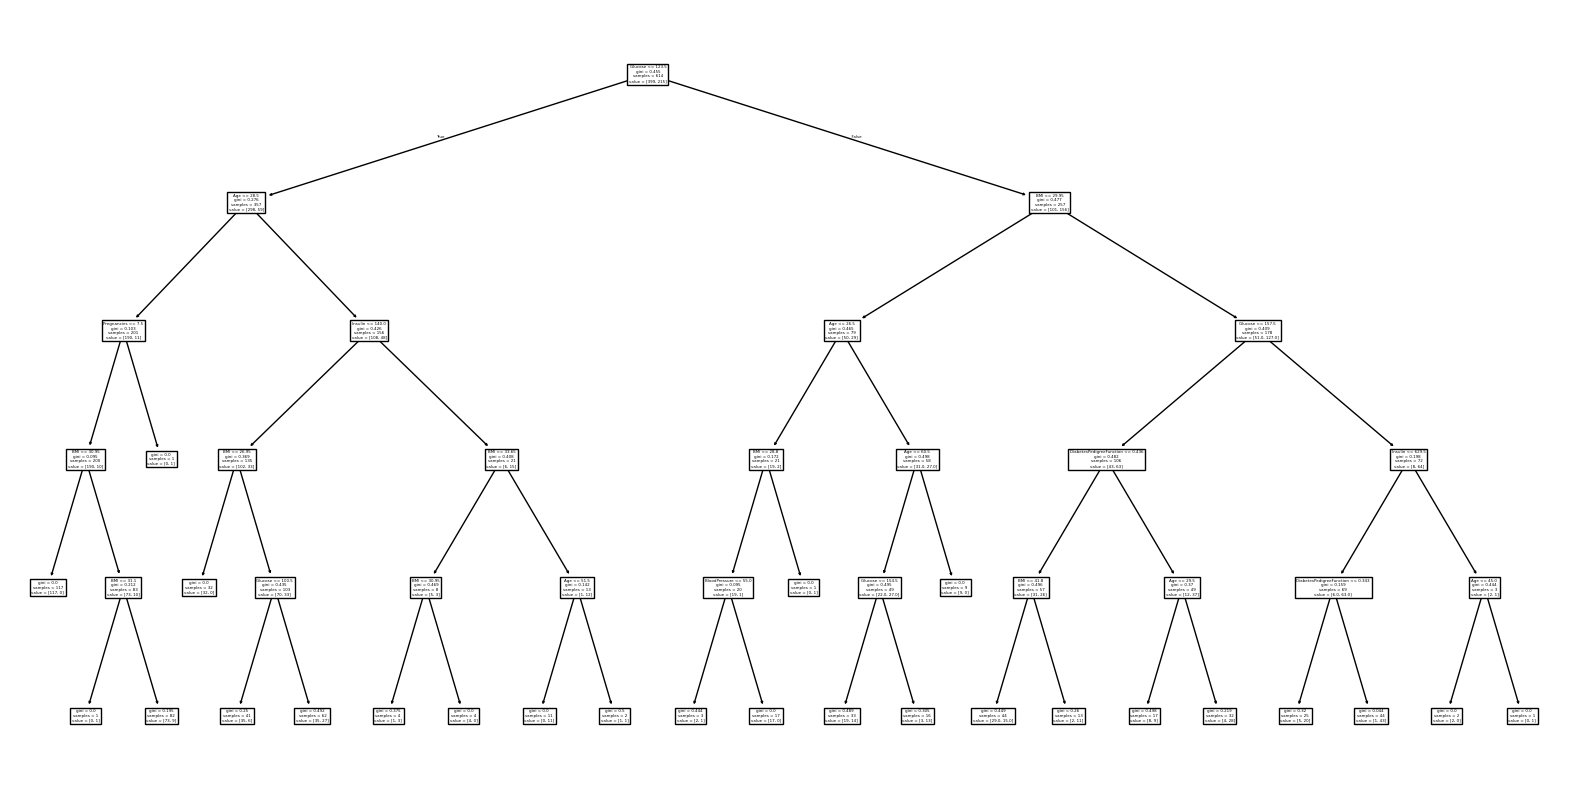

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,10))
plot_tree(model, feature_names =  X_train.columns)

In [13]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='diabetes.dot', feature_names = X_test.columns ,
                class_names=('No Diabetes','Diabetes'), rounded=True, filled=True, impurity=True)

In [14]:
import pydot

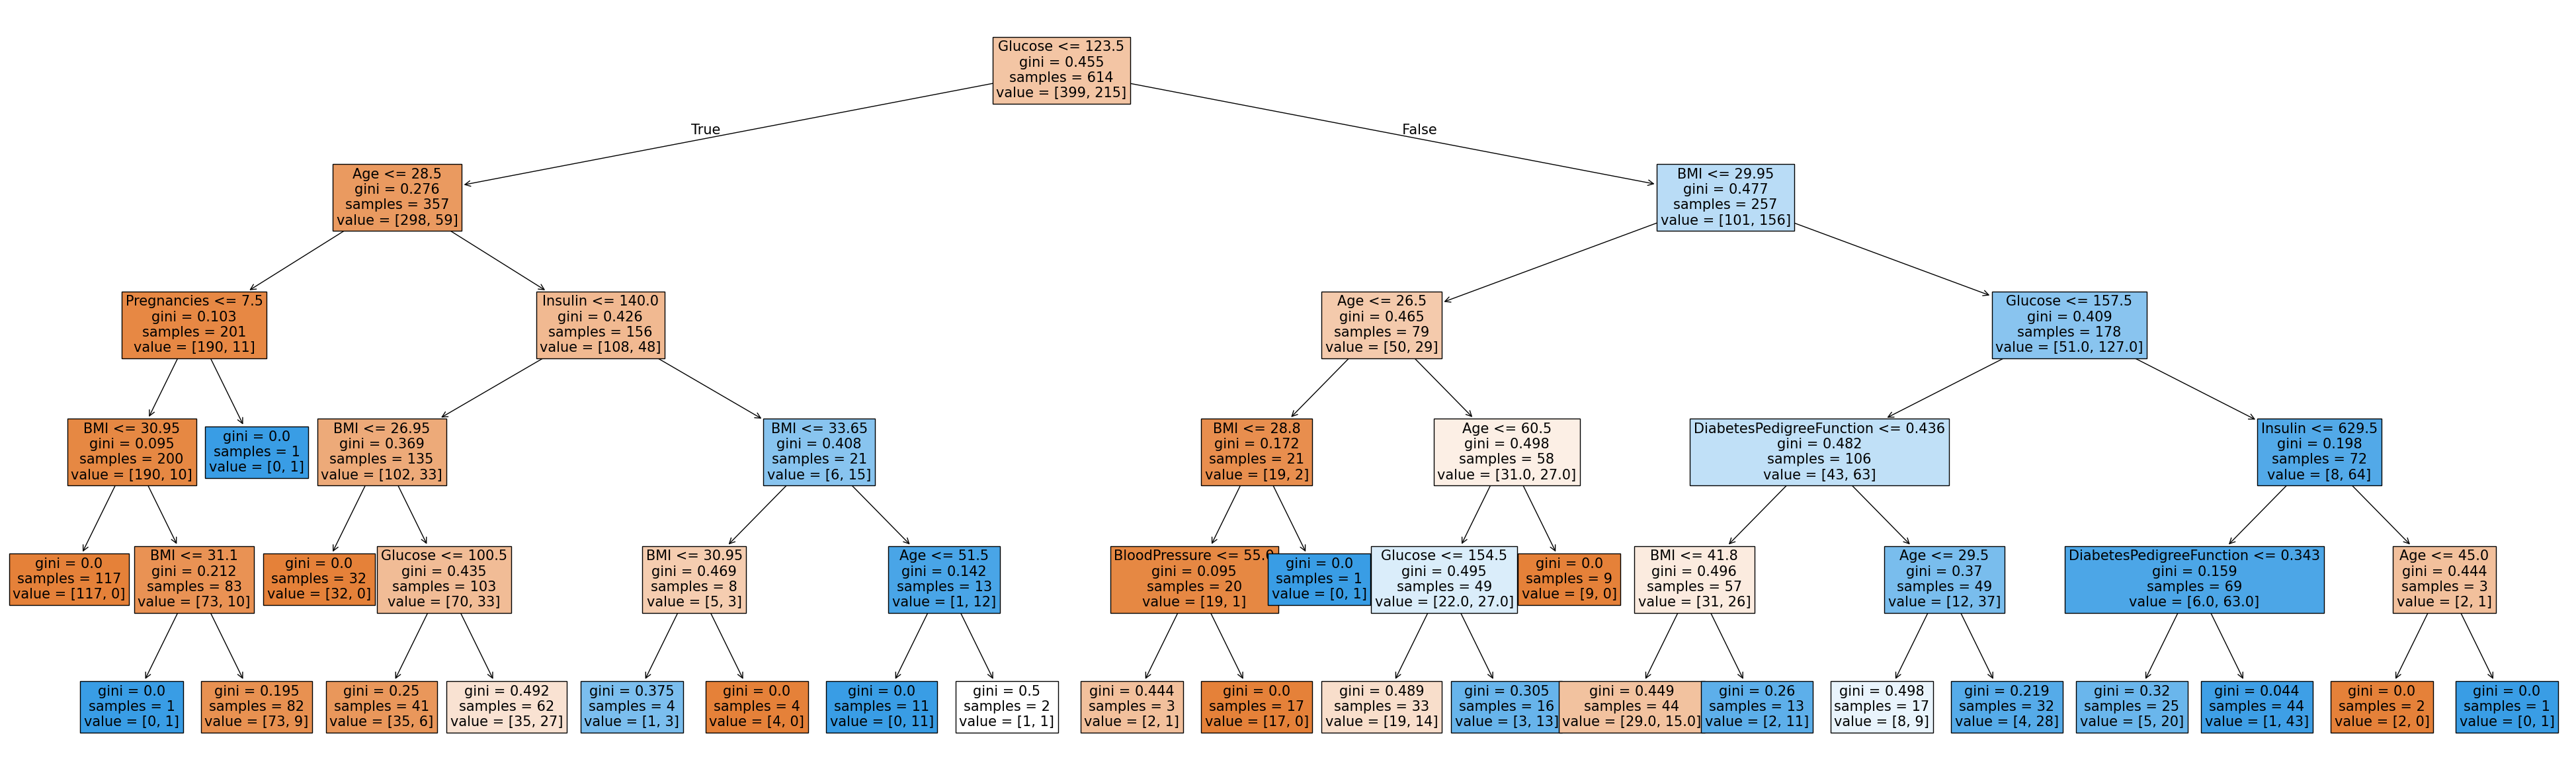

In [15]:
plt.figure(figsize = (50, 15))     #
tree = plot_tree(model, feature_names =X_train.columns, filled = True, fontsize = 15)

#  fontsize 키우고 filled를 True로 하여 같은 칼럼은 같은 색으로 노드 칠함.
# 글루코스와 BMI 등으로 tree가지가 나눠지고 분류 문제의 경우엔 불순도가 낮거나 정보획득이 많은 쪽으로 생겨남

#### Class names이 출력되는 graphiz 

In [16]:
graph = pydot.graph_from_dot_file('diabetes.dot')[0]

diabetes_png = graph.create_png()

In [17]:
from IPython.core.display import Image

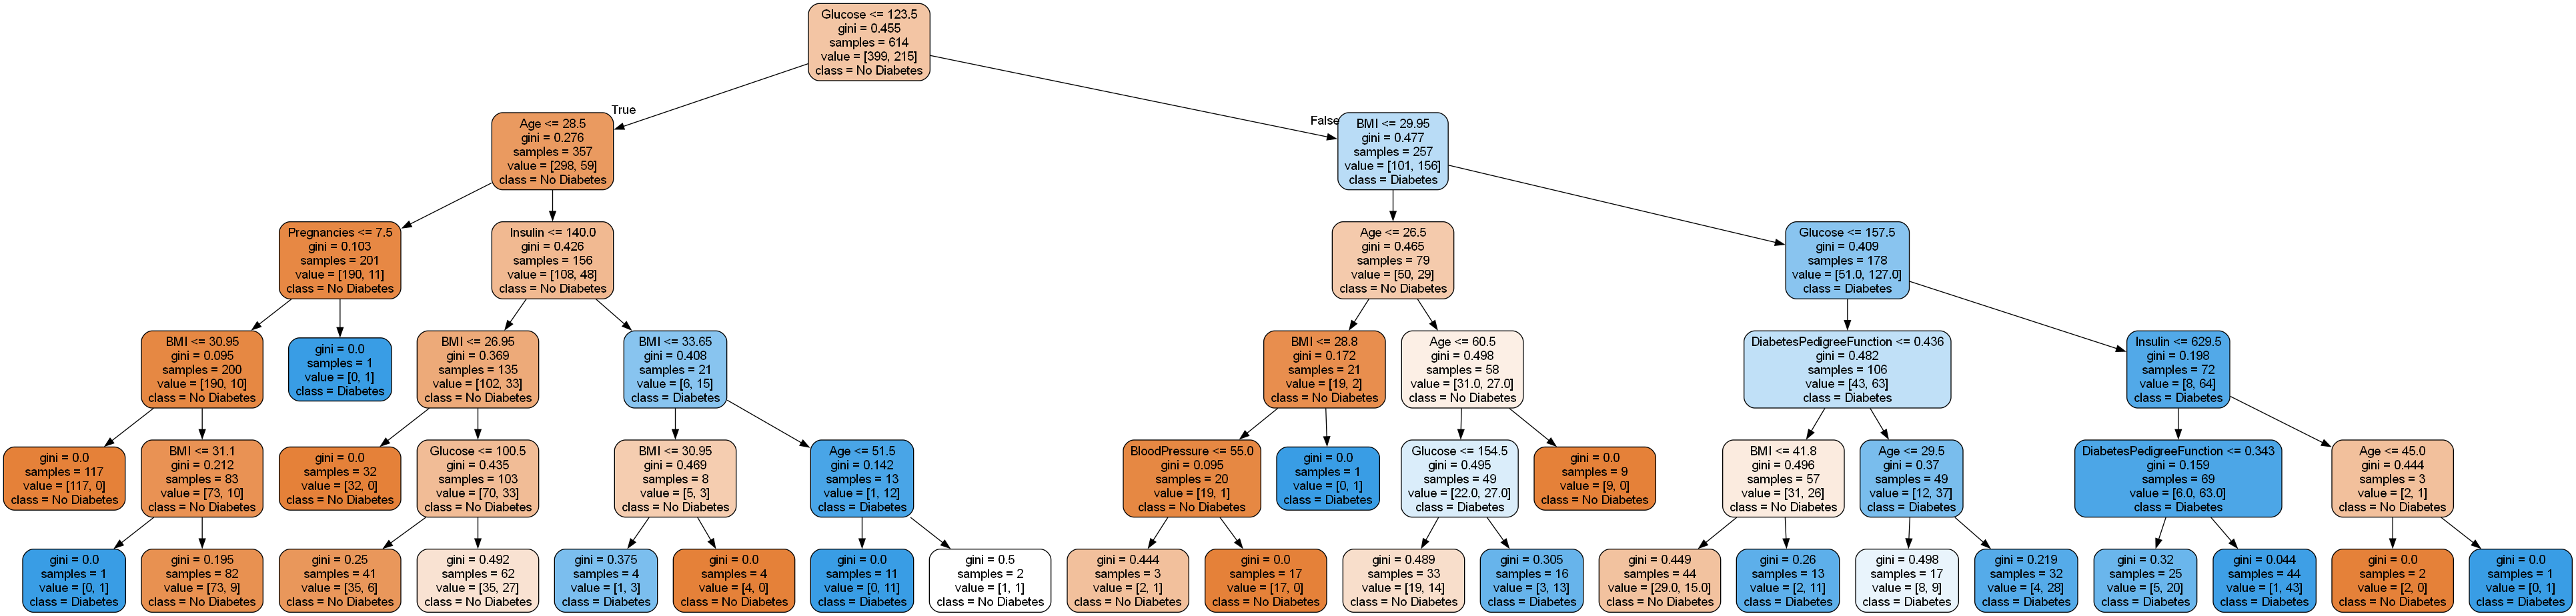

In [18]:
Image(diabetes_png)

#### 특성 중요도 그래프

C:\Users\user\AppData\Local\Temp\ipykernel_23332\185859435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = model.feature_importances_ , y = X_test.columns, palette=colors)


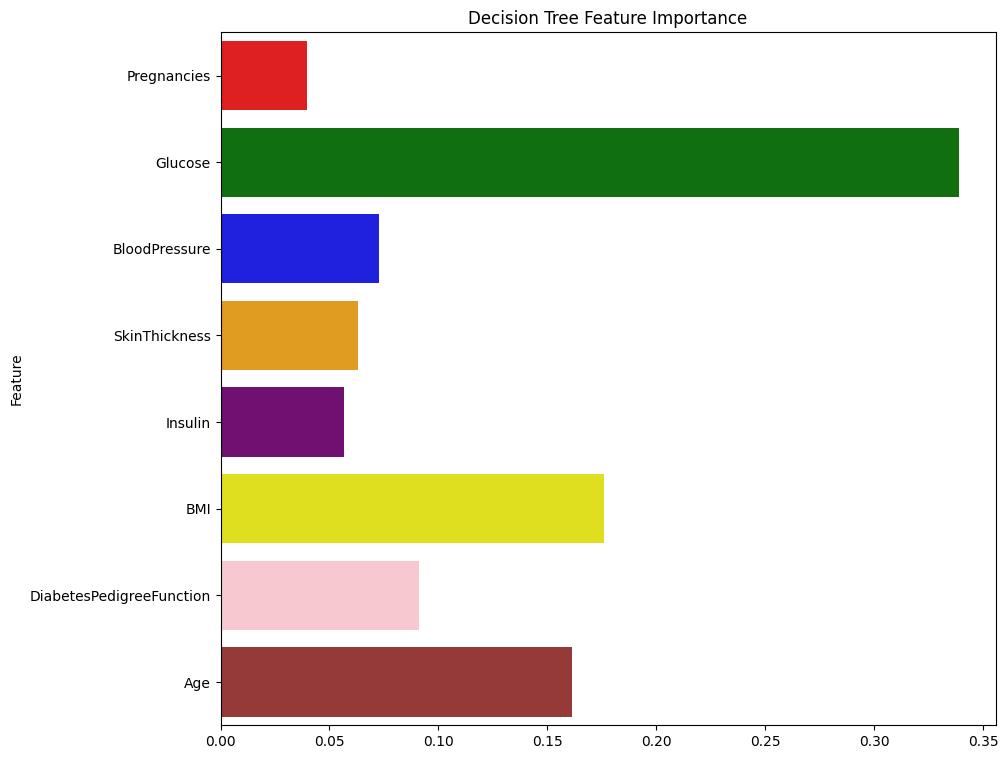

In [24]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'brown']

plt.figure(figsize = ( 10 , 9))
sns.barplot(x = model.feature_importances_ , y = X_test.columns, palette=colors)
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

In [21]:
model.feature_importances_    # 특성 중요도

array([0.03965969, 0.33882233, 0.07279552, 0.06318808, 0.05679492,
       0.17613486, 0.09112295, 0.16148165])

#### 정확도 예측

In [38]:
diff_count = abs(y_test - y_pred).sum()
diff_count

np.int64(42)

In [40]:
diff_count / len(y_test)    # 오분류율 27% 사용 가능

np.float64(0.2727272727272727)